# RANDOM FOREST CLASSIFIER EXAMPLE

You have imported a dataset containing on-time arrival information for a major U.S. airline. That data included 26 columns and thousands of rows, with each row representing one flight and containing information such as the flight's origin, destination, and scheduled departure time. You also loaded the data into a Jupyter notebook and used a simple Python script to create a Pandas DataFrame from it.

In [43]:
#Downloading the data
!curl https://topcs.blob.core.windows.net/public/FlightData.csv -o flightdata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1552k  100 1552k    0     0  1503k      0  0:00:01  0:00:01 --:--:-- 1516k


In [44]:
"""importing the data using numpy 
and viewing the first 5 elements of the data""" 

import pandas as pd
data= pd.read_csv('flightdata.csv')
data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [45]:
#checking the shape of the data
#this give the row count and the column count
data.shape

(11231, 26)

In [46]:
#checking any columns has null values
data.isnull().values.any()

True

In [47]:
#checking which columns have  missing values
data.isnull().any()

YEAR                   False
QUARTER                False
MONTH                  False
DAY_OF_MONTH           False
DAY_OF_WEEK            False
UNIQUE_CARRIER         False
TAIL_NUM               False
FL_NUM                 False
ORIGIN_AIRPORT_ID      False
ORIGIN                 False
DEST_AIRPORT_ID        False
DEST                   False
CRS_DEP_TIME           False
DEP_TIME                True
DEP_DELAY               True
DEP_DEL15               True
CRS_ARR_TIME           False
ARR_TIME                True
ARR_DELAY               True
ARR_DEL15               True
CANCELLED              False
DIVERTED               False
CRS_ELAPSED_TIME       False
ACTUAL_ELAPSED_TIME     True
DISTANCE               False
Unnamed: 25             True
dtype: bool

In [48]:
#counting the number of missing values
data.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [49]:
#checking for data types of each feature or column
data.dtypes

YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
UNIQUE_CARRIER          object
TAIL_NUM                object
FL_NUM                   int64
ORIGIN_AIRPORT_ID        int64
ORIGIN                  object
DEST_AIRPORT_ID          int64
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DEL15              float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DEL15              float64
CANCELLED              float64
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
DISTANCE               float64
Unnamed: 25            float64
dtype: object

# Preparing and Cleaning The Data


Since we have seen our data is far from being clean lets clean the data

In [50]:
#since  the unnamed column has no any data we drop it
#data = data.drop('Unnamed: 25', axis=1) #Uncomment this code and run it
data.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

The DataFrame still contains a lot of missing values, but some of them aren't useful because the columns containing them are not relevant to the model that you are building. The goal of that model is to predict whether a flight you are considering booking is likely to arrive on time. If you know that the flight is likely to be late, you might choose to book another flight.

The DataFrame still contains a lot of missing values, but some of them aren't useful because the columns containing them are not relevant to the model that you are building. The goal of that model is to predict whether a flight you are considering booking is likely to arrive on time. If you know that the flight is likely to be late, you might choose to book another flight.

In [51]:
#FILTER OUT THE COLUMNS WE DONT NEED

In [52]:
data = data[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]]
data.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

In [53]:
data.shape

(11231, 7)

The only column that now contains missing values is the ARR_DEL15 column, which uses 0s to identify flights that arrived on time and 1s for flights that didn't.

In [54]:
#lets check the first five rows with missing values
data[data.isnull().values.any(axis=1)]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,NaN
179,1,10,7,MSP,DTW,1348,NaN
184,1,10,7,MSP,DTW,625,NaN
210,1,10,7,DTW,MSP,1200,NaN
478,1,22,5,SEA,JFK,2305,NaN
481,1,22,5,ATL,JFK,1745,NaN
491,1,22,5,MSP,JFK,1755,NaN
499,1,23,6,JFK,ATL,1325,NaN
500,1,23,6,JFK,ATL,1540,NaN
501,1,23,6,JFK,SEA,740,NaN


The reason these rows are missing ARR_DEL15 values is that they all correspond to flights that were canceled or diverted.

In [55]:
#We replace the NaN values with 1 to mean the flight did not arrive on time
data = data.fillna({'ARR_DEL15': 1})
data.iloc[177:185]
data.isnull().values.any()

False

The CRS_DEP_TIME column of the dataset you are using represents scheduled departure times. The granularity of the numbers in this column — it contains more than 500 unique values — could have a negative impact on accuracy in a machine-learning model. This can be resolved using a technique called binning or quantization. What if you divided each number in this column by 100 and rounded down to the nearest integer? 1030 would become 10, 1925 would become 19, and so on, and you would be left with a maximum of 24 discrete values in this column. Intuitively, it makes sense, because it probably doesn't matter much whether a flight leaves at 10:30 a.m. or 10:40 a.m. It matters a great deal whether it leaves at 10:30 a.m. or 5:30 p.m.

In addition, the dataset's ORIGIN and DEST columns contain airport codes that represent categorical machine-learning values. These columns need to be converted into discrete columns containing indicator variables, sometimes known as "dummy" variables. In other words, the ORIGIN column, which contains five airport codes, needs to be converted into five columns, one per airport, with each column containing 1s and 0s indicating whether a flight originated at the airport that the column represents. The DEST column needs to be handled in a similar manner.

Here we do what we call enconding the data set and scalling

In [56]:
#scaling the scheduled depature time
import math

for index, row in data.iterrows():
    data.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,19,0.0
1,1,1,5,DTW,MSP,13,0.0
2,1,1,5,ATL,SEA,9,0.0
3,1,1,5,SEA,MSP,8,0.0
4,1,1,5,SEA,DTW,23,0.0


Confirm that the numbers in the CRS_DEP_TIME column now fall in the range 0 to 23:

In [57]:
#enconding the ORIGIN and the DEST columns

In [58]:
data = pd.get_dummies(data, columns=['ORIGIN', 'DEST'])
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,19,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,13,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,9,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,8,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,23,0.0,0,0,0,0,1,0,1,0,0,0


The new columns have 1s and 0s indicating whether a given flight originated at or was destined for the corresponding airport

# Now Lets Build Machine Learning Model

To create a machine learning model, you need two datasets: one for training and one for testing.
You also need to separate the DataFrame into feature columns and label columns.

In [59]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data.drop('ARR_DEL15', axis=1), data['ARR_DEL15'], test_size=0.2, random_state=42)

In [60]:
#viewing the shape x_train data
train_x.shape

(8984, 14)

In [61]:
#viewing the shape x_test data
test_x.shape

(2247, 14)

Since we want to know if the train arrived on time or not we are going to you a binary classiffier. Here we are going to use a RandomForestClassifier, which fits multiple decision trees to the data and uses averaging to boost the overall accuracy and limit overfitting.

In [62]:
#Importing and fitting the classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

# Scoring our model or Viewing the performance of our model

In [63]:
#Determinig the accuracy of our model.
#Note: Accuracy is prone to class imbalance so it is not
#always a good measure to determine the performance of our model
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8602581219403649

The mean accuracy is 86%, which seems good on the surface. However, mean accuracy isn't always a reliable indicator of the accuracy of a classification model. Let's dig a little deeper and determine how accurate the model really is — that is, how adept it is at determining whether a flight will arrive on time.



There are several ways to measure the accuracy of a classification model. One of the best overall measures for a binary classification model is Area Under Receiver Operating Characteristic Curve (sometimes referred to as "ROC AUC"), which essentially quantifies how often the model will make a correct prediction regardless of the outcome.

Before you compute the ROC AUC, you must generate prediction probabilities for the test set. These probabilities are estimates for each of the classes, or answers, the model can predict. For example, [0.88199435, 0.11800565] means that there's an 89% chance that a flight will arrive on time (ARR_DEL15 = 0) and a 12% chance that it won't (ARR_DEL15 = 1). The sum of the two probabilities adds up to 100%.

In [64]:
#calculating the probabilities
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)
probabilities

array([[0.8, 0.2],
       [0.9, 0.1],
       [1. , 0. ],
       ...,
       [0.9, 0.1],
       [0.7, 0.3],
       [1. , 0. ]])

To generate an ROC AUC score from the probabilities using scikit-learn's roc_auc_score method

In [65]:
roc_auc_score(test_y, probabilities[:, 1])

0.6743824904998539

The output from the score method reflects how many of the items in the test set the model predicted correctly. This score is skewed by the fact that the dataset the model was trained and tested with contains many more rows representing on-time arrivals than rows representing late arrivals. Because of this imbalance in the data, you're more likely to be correct if you predict that a flight will be on time than if you predict that a flight will be late.

You can learn more about the model's behavior by generating a confusion matrix, also known as an error matrix. The confusion matrix quantifies the number of times each answer was classified correctly or incorrectly. Specifically, it quantifies the number of false positives, false negatives, true positives, and true negatives. This is important, because if a binary classification model trained to recognize cats and dogs is tested with a dataset that is 95% dogs, it could score 95% simply by guessing "dog" every time. But if it failed to identify cats at all, it would be of little value.

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[1882,   54],
       [ 260,   51]])

But look at the second row, which represents flights that were delayed. The first column shows how many delayed flights were incorrectly predicted to be on time. The second column shows how many flights were correctly predicted to be delayed. Clearly, the model isn't nearly as adept at predicting that a flight will be delayed as it is at predicting that a flight will arrive on time. What you want in a confusion matrix is large numbers in the upper-left and lower-right corners, and small numbers (preferably zeros) in the upper-right and lower-left corners.

Other measures of accuracy for a classification model include precision and recall. Suppose the model was presented with three on-time arrivals and three delayed arrivals, and that it correctly predicted two of the on-time arrivals, but incorrectly predicted that two of the delayed arrivals would be on time. In this case, the precision would be 50% (two of the four flights it classified as being on time actually were on time), while its recall would be 67% (it correctly identified two of the three on-time arrivals). You can learn more about precision and recall from https://en.wikipedia.org/wiki/Precision_and_recall

Scikit-learn contains a handy method named precision_score for computing precision.Precision is the positive predicted values

In [67]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.9972375690607734

Scikit-learn also contains a method named recall_score for computing recall. Recall/sensitivity/Probability of Detection is the value os true positive rate.True positives are data point classified as positive by the model that actually are positive (meaning they are correct).

In [68]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.8650159744408946

In the real world, a trained data scientist would look for ways to make the model even more accurate. Among other things, they would try different algorithms and take steps to tune the chosen algorithm to find the optimum combination of parameters. Another likely step would be to expand the dataset to millions of rows rather than a few thousand and also attempt to reduce the imbalance between late and on-time arrivals. But for our purposes, the model is fine as-is.



# Next we Visualize the Output of the model

In [69]:
# Here we use matplotlib and seaborn libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

The first statement is one of several magic commands supported by the Python kernel that you selected when you created the notebook. It enables Jupyter to render Matplotlib output in a notebook without making repeated calls to show. And it must appear before any references to Matplotlib itself. The final statement configures Seaborn to enhance the output from Matplotlib.

Text(0, 0.5, 'True Positive Rate')

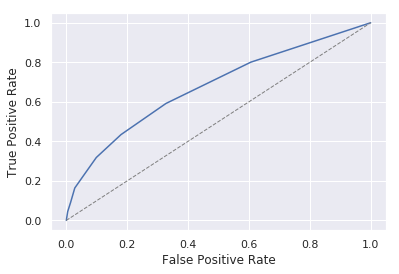

In [70]:
#lets plot the ROC
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

The dotted line in the middle of the graph represents a 50-50 chance of obtaining a correct answer. The blue curve represents the accuracy of your model

The reason you built a machine-learning model is to predict whether a flight will arrive on time or late.
We write a Python function that calls the machine-learning model you built in the previous lab to compute the likelihood that a flight will be on time. Then we will use the function to analyze several flights.

In [71]:
def predict_delay(departure_date_time, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    origin = origin.upper()
    destination = destination.upper()

    input = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if destination == 'ATL' else 0,
              'DEST_DTW': 1 if destination == 'DTW' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_MSP': 1 if destination == 'MSP' else 0,
              'DEST_SEA': 1 if destination == 'SEA' else 0 }]

    return model.predict_proba(pd.DataFrame(input))[0][0]

This function takes as input a date and time, an origin airport code, and a destination airport code, and returns a value between 0.0 and 1.0 indicating the probability that the flight will arrive at its destination on time. It uses the machine-learning model you built in the previous lab to compute the probability. And to call the model, it passes a DataFrame containing the input values to predict_proba. The structure of the DataFrame exactly matches the structure of the DataFrame we used earlier.

#### Note:
Date input to the predict_delay function use the international date format dd/mm/year.

We then compute the probability that a flight from New York to Atlanta on the evening of October 1 will arrive on time. The year we enter is irrelevant because it isn't used by the model.

In [72]:
predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL')

0.6

In [73]:
#Modifying the code to compute the probability that the same flight a day later will arrive on time
predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL')

0.8

In [74]:
#modifying the code to compute the probability that a morning flight the same day from Atlanta to Seattle will arrive on time
predict_delay('2/10/2018 10:00:00', 'ATL', 'SEA')

1.0

You now have an easy way to predict, with a single line of code, whether a flight is likely to be on time or late. Feel free to experiment with other dates, times, origins, and destinations. But keep in mind that the results are only meaningful for the airport codes ATL, DTW, JFK, MSP, and SEA because those are the only airport codes the model was trained with.

Let us plot the probability of on-time arrivals for an evening flight from JFK to ATL over a range of days

(0.0, 1.0)

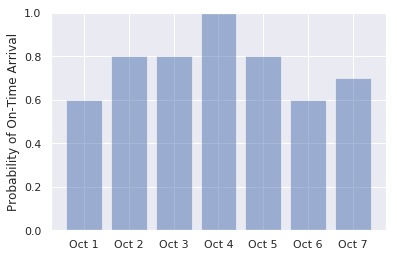

In [75]:
import numpy as np

labels = ('Oct 1', 'Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7')
values = (predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('3/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('4/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('5/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('6/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('7/10/2018 21:45:00', 'JFK', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

We  produce a graph showing the probability that flights leaving SEA for ATL at 9:00 a.m., noon, 3:00 p.m., 6:00 p.m., and 9:00 p.m. on January 30 will arrive on time.

(0.0, 1.0)

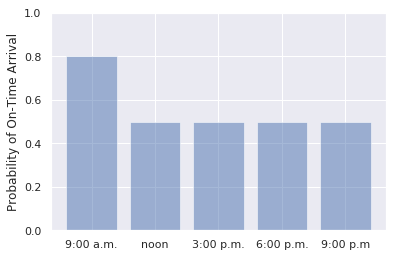

In [76]:
import numpy as np

labels = ("9:00 a.m.", "noon", "3:00 p.m.", "6:00 p.m.", "9:00 p.m")
values = (predict_delay('30/1/2018 09:00:00', 'SEA', 'ATL'),
          predict_delay('30/1/2018 12:00:00', 'SEA', 'ATL'),
          predict_delay('30/1/2018 15:00:00', 'SEA', 'ATL'),
          predict_delay('30/1/2018 18:00:00', 'SEA', 'ATL'),
          predict_delay('30/1/2018 21:00:00', 'SEA', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

If you are new to Matplotlib and would like to learn more about it, you will find an excellent tutorial at https://www.labri.fr/perso/nrougier/teaching/matplotlib/. There is much more to Matplotlib than what was shown here, which is one reason why it is so popular in the Python community.